In [10]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_rel
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
from statsmodels.graphics.gofplots import qqplot

In [2]:
data=pd.read_excel('Resamples.xlsx', index=False)
data

,Datasets,NB,C45,SVML,SVMQ,Logistic,BN,RandF,RotF,MLP,...,BOSS,TSF,TSBF,LPS,ACF,PS,EE,CID_DTW,Flat-COTE,HIVE-COTE
0,Adiac,0.544501,0.492916,0.410179,0.734731,0.621637,0.496573,0.646803,0.753632,0.728670,...,0.749412,0.707187,0.726777,0.764962,0.657545,0.741816,0.664962,0.627391,0.809847,0.815396
1,ArrowHead,0.673371,0.638400,0.811829,0.807486,0.713714,0.705829,0.775200,0.789257,0.787771,...,0.875200,0.789371,0.800857,0.806286,0.694514,0.724514,0.859657,0.829143,0.876800,0.887657
2,Beef,0.506333,0.492667,0.737000,0.766000,0.818000,0.507333,0.598667,0.818667,0.739333,...,0.615000,0.647667,0.554333,0.519667,0.584667,0.709333,0.532000,0.530667,0.764000,0.722667
3,BeetleFly,0.746000,0.687500,0.762500,0.769000,0.750000,0.743000,0.756500,0.791000,0.764000,...,0.948500,0.842500,0.798500,0.892500,0.799500,0.842000,0.822500,0.806000,0.921000,0.959000
4,BirdChicken,0.628500,0.745500,0.682000,0.744500,0.630500,0.751500,0.772000,0.747500,0.708500,...,0.984000,0.838500,0.902000,0.854000,0.887500,0.941000,0.848000,0.848500,0.941000,0.950500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Wine,0.612778,0.756481,0.864815,0.918148,0.938519,0.725370,0.863519,0.918519,0.900556,...,0.911667,0.880556,0.879259,0.884259,0.773704,0.798704,0.886667,0.891296,0.903519,0.912037
81,WordSynonyms,0.481614,0.374044,0.530110,0.587351,0.338981,0.250141,0.565580,0.586113,0.554342,...,0.658762,0.643464,0.668981,0.728135,0.393699,0.371003,0.778401,0.738339,0.748072,0.747962
82,Worms,0.342727,0.406883,0.386753,0.480779,0.392468,0.414026,0.591948,0.604675,0.406104,...,0.734935,0.627922,0.668442,0.641558,0.718831,0.684156,0.644416,0.633377,0.725065,0.734026
83,WormsTwoClass,0.545714,0.600390,0.544545,0.592078,0.569221,0.561688,0.628052,0.656883,0.598571,...,0.809740,0.685065,0.754935,0.742597,0.770390,0.759351,0.717403,0.735844,0.785195,0.783896


In [3]:
data_subset=data[['BOSS', 'BoP']]
data_subset

,BOSS,BoP
0,0.749412,0.591611
1,0.875200,0.767086
2,0.615000,0.503000
3,0.948500,0.845000
4,0.984000,0.852000
...,...,...
80,0.911667,0.894444
81,0.658762,0.522837
82,0.734935,0.617273
83,0.809740,0.744286


In [4]:
BOSS_mean=data['BOSS'].mean()
BoP_mean=data['BoP'].mean()

print ('The mean of BOSS is {} and BoP is {}'.format(BOSS_mean, BoP_mean))

The mean of BOSS is 0.8334602488588239 and BoP is 0.7462098589058823


In [5]:
data_subset.describe()

,BOSS,BoP
count,85.000000,85.000000
mean,0.833460,0.746210
std,0.148376,0.169548
min,0.256187,0.148012
25%,0.750240,0.617273
50%,0.867388,0.767086
75%,0.950600,0.888434
max,1.000000,0.996572


Text(0.5, 0, 'Models')

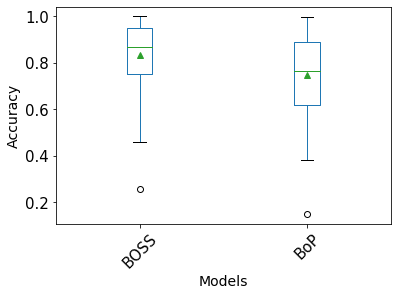

In [6]:
data.boxplot(column=['BOSS', 'BoP'],grid=False, rot=45, fontsize=15, showmeans=True)
plt.ylabel("Accuracy", size=14)
plt.xlabel("Models", size=14)

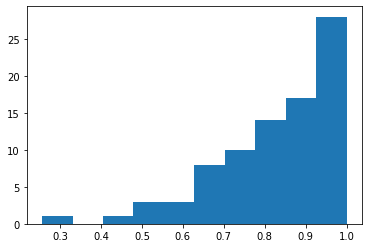

In [7]:
pyplot.hist(data['BOSS'])
pyplot.show()

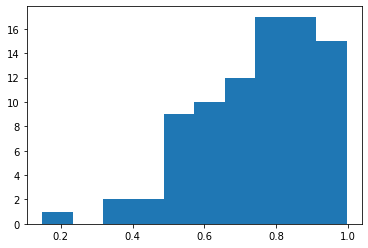

In [8]:
pyplot.hist(data['BoP'])
pyplot.show()

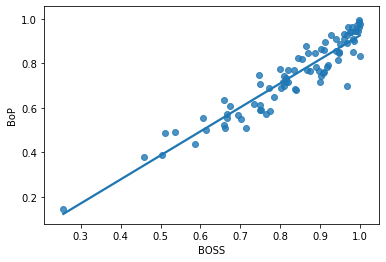

In [9]:
sns.regplot(x = "BOSS",
            y = "BoP", 
            ci = None,
            data = data_subset)

In [13]:
from scipy.stats import shapiro
# normality test
stat, p = shapiro(data_subset)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')


Statistics=0.928, p=0.000
Sample does not look Gaussian (reject H0)


In [10]:
##Difference
data_subset['Difference']=data_subset['BOSS']- data_subset['BoP']
data_subset

/Users/samhas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,BOSS,BoP,Difference
0,0.749412,0.591611,0.157801
1,0.875200,0.767086,0.108114
2,0.615000,0.503000,0.112000
3,0.948500,0.845000,0.103500
4,0.984000,0.852000,0.132000
...,...,...,...
80,0.911667,0.894444,0.017222
81,0.658762,0.522837,0.135925
82,0.734935,0.617273,0.117662
83,0.809740,0.744286,0.065455


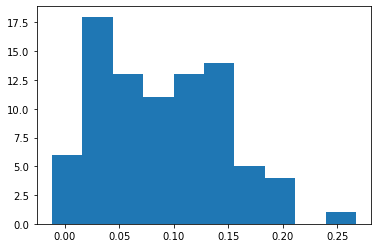

In [11]:
pyplot.hist(data_subset['Difference'])
pyplot.show()

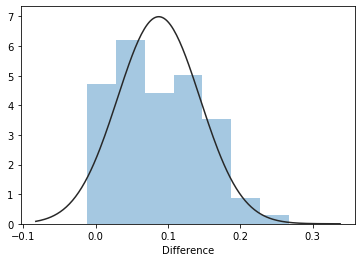

In [12]:
from scipy.stats import norm
ax = sns.distplot(data_subset['Difference'], fit=norm, kde=False)


In [13]:
Hypothesis= '''
The Null hypotheiss is H0 : 𝜇BOSS = 𝜇BoP
The alternative hypotheiss is H1: 𝜇BOSS != 𝜇BoP
'''
print (Hypothesis)


The Null hypotheiss is H0 : 𝜇BOSS = 𝜇BoP
The alternative hypotheiss is H1: 𝜇BOSS != 𝜇BoP



In [16]:
ttest,pval = ttest_rel(data['BOSS'],data['BoP'])
print("t-value",ttest)
print("p-value",pval)

if pval <0.01:
  print("we reject null hypothesis (H0) stating that there is a significant difference between the two models BOSS and BoP")
else:
  print("we accept null hypothesis")

t-value 14.01195707151901
p-value 1.0739869175484149e-23
we reject null hypothesis (H0) stating that there is a significant difference between the two models BOSS and BoP
